# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)

*   [`Headliner_all_df.pkl` Информация о всех звонках `Headliner`](https://drive.google.com/file/d/1857LwaVtJ364yFMpXemILSuVu84YEPPw/view?usp=sharing)
*   [`Headliner_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Headliner`](https://drive.google.com/file/d/1-HOWuSAngv9dXYiMlyRXX0kmVVAAT4sV/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Целевые звонки `Headliner`](https://drive.google.com/file/d/1-J1gcgb2mrNDx3R_3l12kq0htS8PTkSv/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Нецелевые звонки `Headliner`](https://drive.google.com/file/d/1dGf3UrVeQg0VfFhBL_lZfm-gaczPYBnL/view?usp=sharing)
*   [`Headliner_moot_df.pkl` Спорные звонки `Headliner`](https://drive.google.com/file/d/1-7vtN8vJNWgWfY8JE8bqoRXkUpvRE_og/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)

*   [`Primavera_all_df.pkl` Информация о всех звонках `Primavera`](https://drive.google.com/file/d/1-2-RlxkKHj5e6RkvbrN7_vs1h5aVXJFk/view?usp=sharing)
*   [`Primavera_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Primavera`](https://drive.google.com/file/d/1-INI9JsU9jsOkPDiGMKhftt18KXgF6-K/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Целевые звонки `Primavera`](https://drive.google.com/file/d/1-JVtM9fOr6XoM7MVxkoVsYfwdZ6GQ--i/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Нецелевые звонки `Primavera`](https://drive.google.com/file/d/1-KwG8M-0wEn-5C4ta-B8_xYGCXDOhpnH/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)

*   [`Paveletskaya_city_all_df.pkl` Информация о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Cy78DqRZ3sbIHkg25wzVWPL-lST5oQa/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-J1BoALFH4-HRdVXjnkyr-fExmtQpUc7/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Целевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-MrjnBHDj65CEjJxLfPnp-hq07V_wtZK/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Нецелевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-WCCyYaorHkBYoh5ugNsCkD7cb1PKH6D/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Сводный датафрейм с информацией о всех звонках](https://drive.google.com/file/d/15ijhw62sp2JNH6pryqZtM5akQHUnsTzi/view?usp=sharing)
*   [`total_work_df.pkl` Сводный рабочий датафрейм с информацией о всех звонках](https://drive.google.com/file/d/1-056tLrjP5yRQW8yRtwutvXs3zmPulW7/view?usp=sharing)

# 4 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [3]:
import os            # для работы с операционной системой
import pickle as pkl # для сохранения и загрузки переменных
import pandas as pd  # для работы с таблицами
import numpy  as np  # для работы с массивами
import re            # для работы с регулярными выражениями

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                         # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                            # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                             # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                            # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                     # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'               # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'               # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'               # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'            # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                       # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                    # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                      # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'            # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                      # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                    # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                      # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'      # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'              # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                # путь к информации о новых звонках проекта Paveletskaya_city

## Анализ и предобработка датафреймов

### Headliner

#### Загрузка датафреймов

In [ ]:
# Загружаем Headliner_df из pkl
with open(df_path + 'Headliner_df.pkl', 'rb') as f:
  Headliner_df = pkl.load(f)

# Загружаем Headliner_new_df из pkl
with open(df_path + 'Headliner_new_df.pkl', 'rb') as f:
  Headliner_new_df = pkl.load(f)

In [ ]:
# Загружаем Headliner_calls_df из pkl
with open(df_path + 'Headliner_calls_df.pkl', 'rb') as f:
  Headliner_calls_df = pkl.load(f)

# Загружаем Headliner_new_calls_df из pkl
with open(df_path + 'Headliner_new_calls_df.pkl', 'rb') as f:
  Headliner_new_calls_df = pkl.load(f)

#### Сравнение датафреймов

In [ ]:
# Смотрим несовпадающие столбцы Headliner_new_df vs Headliner_df
for column in Headliner_new_df.columns.tolist():
  if column not in Headliner_df.columns.tolist():
    print(f"Headliner_new_df['{column}'], тип данных: {Headliner_new_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Headliner_df vs Headliner_new_df
for column in Headliner_df.columns.tolist():
  if column not in Headliner_new_df.columns.tolist():
    print(f'Headliner_df[{column}], тип данных: {Headliner_df[column].dtypes}')

#### Сохранение датафреймов

In [ ]:
# Сортируем по столбцу 'Идентификатор сессии звонка'
Headliner_df = Headliner_df.sort_values('Идентификатор сессии звонка')
Headliner_new_df = Headliner_new_df.sort_values('Идентификатор сессии звонка')
Headliner_df.index = range(Headliner_df.shape[0])
Headliner_new_df.index = range(Headliner_new_df.shape[0])

In [ ]:
# Сохраняем Headliner_df в pkl
with open(df_path + 'Headliner_df.pkl', 'wb') as f:
  pkl.dump(Headliner_df, f)

# Сохраняем Headliner_new_df в pkl
with open(df_path + 'Headliner_new_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_df, f)

### Primavera

#### Загрузка датафреймов

In [ ]:
# Загружаем Primavera_df из pkl
with open(df_path + 'Primavera_df.pkl', 'rb') as f:
  Primavera_df = pkl.load(f)

# Загружаем Primavera_new_df из pkl
with open(df_path + 'Primavera_new_df.pkl', 'rb') as f:
  Primavera_new_df = pkl.load(f)

In [ ]:
# Загружаем Primavera_calls_df из pkl
with open(df_path + 'Primavera_calls_df.pkl', 'rb') as f:
  Primavera_calls_df = pkl.load(f)

# Загружаем Primavera_new_calls_df из pkl
with open(df_path + 'Primavera_new_calls_df.pkl', 'rb') as f:
  Primavera_new_calls_df = pkl.load(f)

#### Сравнение датафреймов

In [ ]:
# Смотрим несовпадающие столбцы Primavera_new_df vs Primavera_df
for column in Primavera_new_df.columns.tolist():
  if column not in Primavera_df.columns.tolist():
    print(f"Primavera_new_df['{column}'], тип данных: {Primavera_new_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Primavera_df vs Primavera_new_df
for column in Primavera_df.columns.tolist():
  if column not in Primavera_new_df.columns.tolist():
    print(f"Primavera_df['{column}'], тип данных: {Primavera_df[column].dtypes}")

Primavera_df['Длительность ожидания ответа'], тип данных: float64
Primavera_df['Причина завершения'], тип данных: object
Primavera_df['Виртуальный номер'], тип данных: object


In [ ]:
# Добавляем столбец 'Длительность ожидания ответа' в Primavera_new_df
Primavera_new_df['Длительность ожидания ответа'] = pd.NA

In [ ]:
# Добавляем столбец 'Причина завершения' в Primavera_new_df
Primavera_new_df['Причина завершения'] = pd.NA

In [ ]:
# Добавляем столбец 'Виртуальный номер' в Primavera_new_df
Primavera_new_df['Виртуальный номер'] = pd.NA

In [ ]:
# Упорядочиваем столбцы в Primavera_new_df как в Primavera_df
Primavera_new_df = Primavera_new_df[Primavera_df.columns]

In [ ]:
# Смотрим несовпадающие столбцы Primavera_df vs Primavera_new_df
for column in Primavera_df.columns.tolist():
  if column not in Primavera_new_df.columns.tolist():
    print(f"Primavera_df['{column}'], тип данных: {Primavera_df[column].dtypes}")

#### Сохранение датафреймов

In [ ]:
# Сортируем по столбцу 'Идентификатор сессии звонка'
Primavera_df = Primavera_df.sort_values('Идентификатор сессии звонка')
Primavera_new_df = Primavera_new_df.sort_values('Идентификатор сессии звонка')
Primavera_df.index = range(Primavera_df.shape[0])
Primavera_new_df.index = range(Primavera_new_df.shape[0])

In [ ]:
# Сохраняем Primavera_df в pkl
with open(df_path + 'Primavera_df.pkl', 'wb') as f:
  pkl.dump(Primavera_df, f)

# Сохраняем Primavera_new_df в pkl
with open(df_path + 'Primavera_new_df.pkl', 'wb') as f:
  pkl.dump(Primavera_new_df, f)

### Paveletskaya_city

#### Загрузка датафреймов

In [ ]:
# Загружаем Paveletskaya_df из pkl
with open(df_path + 'Paveletskaya_df.pkl', 'rb') as f:
  Paveletskaya_df = pkl.load(f)

# Загружаем Paveletskaya_city_df из pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'rb') as f:
  Paveletskaya_city_df = pkl.load(f)

# Загружаем Paveletskaya_city_new_df из pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'rb') as f:
  Paveletskaya_city_new_df = pkl.load(f)

In [ ]:
# Загружаем Paveletskaya_city_calls_df из pkl
with open(df_path + 'Paveletskaya_city_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_calls_df = pkl.load(f)

# Загружаем Paveletskaya_city_new_calls_df из pkl
with open(df_path + 'Paveletskaya_city_new_calls_df.pkl', 'rb') as f:
  Paveletskaya_city_new_calls_df = pkl.load(f)

#### Сравнение датафреймов

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_df vs Paveletskaya_city_df
for column in Paveletskaya_df.columns.tolist():
  if column not in Paveletskaya_city_df.columns.tolist():
    print(f"Paveletskaya_df['{column}'], тип данных: {Paveletskaya_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_df vs Paveletskaya_df
for column in Paveletskaya_city_df.columns.tolist():
  if column not in Paveletskaya_df.columns.tolist():
    print(f"Paveletskaya_city_df['{column}'], тип данных: {Paveletskaya_city_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_new_df vs Paveletskaya_city_df
for column in Paveletskaya_city_new_df.columns.tolist():
  if column not in Paveletskaya_city_df.columns.tolist():
    print(f"Paveletskaya_city_new_df['{column}'], тип данных: {Paveletskaya_city_new_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Paveletskaya_city_df vs Paveletskaya_city_new_df
for column in Paveletskaya_city_df.columns.tolist():
  if column not in Paveletskaya_city_new_df.columns.tolist():
    print(f"Paveletskaya_city_df['{column}'], тип данных: {Paveletskaya_city_df[column].dtypes}")

#### Сохранение датафреймов

In [ ]:
# Сортируем по столбцу 'Идентификатор сессии звонка'
Paveletskaya_df = Paveletskaya_df.sort_values('Идентификатор сессии звонка')
Paveletskaya_city_df = Paveletskaya_city_df.sort_values('Идентификатор сессии звонка')
Paveletskaya_city_new_df = Paveletskaya_city_new_df.sort_values('Идентификатор сессии звонка')
Paveletskaya_df.index = range(Paveletskaya_df.shape[0])
Paveletskaya_city_df.index = range(Paveletskaya_city_df.shape[0])
Paveletskaya_city_new_df.index = range(Paveletskaya_city_new_df.shape[0])

In [ ]:
# Сохраняем Paveletskaya_df в pkl
with open(df_path + 'Paveletskaya_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_df, f)

# Сохраняем Paveletskaya_city_df в pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_df, f)

# Сохраняем Paveletskaya_city_new_df в pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_df, f)

## Соединение датафреймов проектов

### Сравнение датафреймов

In [ ]:
print(Headliner_df.shape)
print(Headliner_new_df.shape)
print(Primavera_df.shape)
print(Primavera_new_df.shape)
print(Paveletskaya_df.shape)
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)

(4759, 75)
(1542, 75)
(3972, 77)
(1523, 77)
(1211, 77)
(9327, 77)
(1518, 77)


In [ ]:
# Смотрим несовпадающие столбцы Headliner_df vs Primavera_df
for column in Headliner_df.columns.tolist():
  if column not in Primavera_df.columns.tolist():
    print(f"Headliner_df['{column}'], тип данных: {Headliner_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Headliner_new_df vs Primavera_df
for column in Headliner_new_df.columns.tolist():
  if column not in Primavera_df.columns.tolist():
    print(f"Headliner_new_df['{column}'], тип данных: {Headliner_new_df[column].dtypes}")

In [ ]:
# Смотрим несовпадающие столбцы Primavera_df vs Headliner_df
for column in Primavera_df.columns.tolist():
  if column not in Headliner_df.columns.tolist():
    print(f"Primavera_df['{column}'], тип данных: {Primavera_df[column].dtypes}")

Primavera_df['Идентификатор звонка во внешней системе'], тип данных: object
Primavera_df['Длительность обработки'], тип данных: object


In [ ]:
# Смотрим несовпадающие столбцы Primavera_df vs Headliner_new_df
for column in Primavera_df.columns.tolist():
  if column not in Headliner_new_df.columns.tolist():
    print(f"Primavera_df['{column}'], тип данных: {Primavera_df[column].dtypes}")

Primavera_df['Идентификатор звонка во внешней системе'], тип данных: object
Primavera_df['Длительность обработки'], тип данных: object


In [ ]:
# Добавляем столбец 'Идентификатор звонка во внешней системе' в Headliner_df
Headliner_df['Идентификатор звонка во внешней системе'] = pd.NA

In [ ]:
# Добавляем столбец 'Идентификатор звонка во внешней системе' в Headliner_df
Headliner_df['Длительность обработки'] = pd.NA

In [ ]:
# Добавляем столбец 'Идентификатор звонка во внешней системе' в Headliner_new_df
Headliner_new_df['Идентификатор звонка во внешней системе'] = pd.NA

In [ ]:
# Добавляем столбец 'Длительность обработки' в Headliner_new_df
Headliner_new_df['Длительность обработки'] = pd.NA

In [ ]:
print(Headliner_df.shape)
print(Headliner_new_df.shape)
print(Primavera_df.shape)
print(Primavera_new_df.shape)
print(Paveletskaya_df.shape)
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)

(4759, 77)
(1542, 77)
(3972, 77)
(1523, 77)
(1211, 77)
(9327, 77)
(1518, 77)


### Упорядочивание столбцов

In [ ]:
# Упорядочиваем столбцы в Headliner_df как в Primavera_df
Headliner_df = Headliner_df[Primavera_df.columns]

In [ ]:
# Упорядочиваем столбцы в Headliner_new_df как в Primavera_df
Headliner_new_df = Headliner_new_df[Primavera_df.columns]

In [ ]:
# Упорядочиваем столбцы в Paveletskaya_df как в Primavera_df
Paveletskaya_df = Paveletskaya_df[Primavera_df.columns]

In [ ]:
# Упорядочиваем столбцы в Paveletskaya_city_df как в Primavera_df
Paveletskaya_city_df = Paveletskaya_city_df[Primavera_df.columns]

In [ ]:
# Упорядочиваем столбцы в Paveletskaya_city_new_df как в Primavera_df
Paveletskaya_city_new_df = Paveletskaya_city_new_df[Primavera_df.columns]

### Сохранение датафреймов проектов

In [ ]:
# Сохраняем Headliner_df в pkl
with open(df_path + 'Headliner_df.pkl', 'wb') as f:
  pkl.dump(Headliner_df, f)

# Сохраняем Headliner_new_df в pkl
with open(df_path + 'Headliner_new_df.pkl', 'wb') as f:
  pkl.dump(Headliner_new_df, f)

# Сохраняем Paveletskaya_df в pkl
with open(df_path + 'Paveletskaya_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_df, f)

# Сохраняем Paveletskaya_city_df в pkl
with open(df_path + 'Paveletskaya_city_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_df, f)

# Сохраняем Paveletskaya_city_new_df в pkl
with open(df_path + 'Paveletskaya_city_new_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_new_df, f)

### Соединение датафреймов проекта `Headliner`

In [ ]:
print(Headliner_df.shape)
print(Headliner_new_df.shape)

(4759, 77)
(1542, 77)


In [ ]:
# Соединяем датафреймы
Headliner_all_df = pd.concat([Headliner_df, Headliner_new_df])
Headliner_all_df.index = range(Headliner_all_df.shape[0])
Headliner_all_df.shape

(6301, 77)

In [ ]:
# Сохраняем Headliner_all_df в pkl
with open(df_path + 'Headliner_all_df.pkl', 'wb') as f:
  pkl.dump(Headliner_all_df, f)

In [ ]:
# Рабочий датафрейм
Headliner_work_df = Headliner_all_df[Headliner_all_df['Файл записи звонка'].notna()]
Headliner_work_df = Headliner_work_df[Headliner_work_df['Класс'] != 'Неопределено']
Headliner_work_df.index = range(Headliner_work_df.shape[0])
Headliner_work_df.shape

(3264, 77)

In [ ]:
# Сохраняем Headliner_work_df в pkl
with open(df_path + 'Headliner_work_df.pkl', 'wb') as f:
  pkl.dump(Headliner_work_df, f)

In [ ]:
# Целевые звонки
Headliner_targets_df = Headliner_work_df[Headliner_work_df['Класс'] == 'Целевой']
Headliner_targets_df.index = range(Headliner_targets_df.shape[0])
Headliner_targets_df.shape

(549, 77)

In [ ]:
# Сохраняем Headliner_targets_df в pkl
with open(df_path + 'Headliner_targets_df.pkl', 'wb') as f:
  pkl.dump(Headliner_targets_df, f)

In [ ]:
# Нецелевые звонки
Headliner_not_targets_df = Headliner_work_df[Headliner_work_df['Класс'] == 'Нецелевой']
Headliner_not_targets_df.index = range(Headliner_not_targets_df.shape[0])
Headliner_not_targets_df.shape

(1082, 77)

In [ ]:
# Сохраняем Headliner_not_targets_df в pkl
with open(df_path + 'Headliner_not_targets_df.pkl', 'wb') as f:
  pkl.dump(Headliner_not_targets_df, f)

In [ ]:
# Спорные звонки
Headliner_moot_df = Headliner_work_df[Headliner_work_df['Класс'] == 'Спорный']
Headliner_moot_df.index = range(Headliner_moot_df.shape[0])
Headliner_moot_df.shape

(1633, 77)

In [ ]:
# Сохраняем Headliner_moot_df в pkl
with open(df_path + 'Headliner_moot_df.pkl', 'wb') as f:
  pkl.dump(Headliner_moot_df, f)

### Соединение датафреймов проекта `Primavera`

In [ ]:
print(Primavera_df.shape)
print(Primavera_new_df.shape)

(3972, 77)
(1523, 77)


In [ ]:
# Соединяем датафреймы
Primavera_all_df = pd.concat([Primavera_df, Primavera_new_df])
Primavera_all_df.index = range(Primavera_all_df.shape[0])
Primavera_all_df.shape

(5495, 77)

In [ ]:
# Сохраняем Primavera_all_df в pkl
with open(df_path + 'Primavera_all_df.pkl', 'wb') as f:
  pkl.dump(Primavera_all_df, f)

In [ ]:
# Рабочий датафрейм
Primavera_work_df = Primavera_all_df[Primavera_all_df['Файл записи звонка'].notna()]
Primavera_work_df = Primavera_work_df[Primavera_work_df['Класс'] != 'Неопределено']
Primavera_work_df.index = range(Primavera_work_df.shape[0])
Primavera_work_df.shape

(2272, 77)

In [ ]:
# Сохраняем Primavera_work_df в pkl
with open(df_path + 'Primavera_work_df.pkl', 'wb') as f:
  pkl.dump(Primavera_work_df, f)

In [ ]:
# Целевые звонки
Primavera_targets_df = Primavera_work_df[Primavera_work_df['Класс'] == 'Целевой']
Primavera_targets_df.index = range(Primavera_targets_df.shape[0])
Primavera_targets_df.shape

(969, 77)

In [ ]:
# Сохраняем Primavera_targets_df в pkl
with open(df_path + 'Primavera_targets_df.pkl', 'wb') as f:
  pkl.dump(Primavera_targets_df, f)

In [ ]:
# Нецелевые звонки
Primavera_not_targets_df = Primavera_work_df[Primavera_work_df['Класс'] == 'Нецелевой']
Primavera_not_targets_df.index = range(Primavera_not_targets_df.shape[0])
Primavera_not_targets_df.shape

(1303, 77)

In [ ]:
# Сохраняем Primavera_not_targets_df в pkl
with open(df_path + 'Primavera_not_targets_df.pkl', 'wb') as f:
  pkl.dump(Primavera_not_targets_df, f)

### Соединение датафреймов проекта `Paveletskaya_city`

In [ ]:
print(Paveletskaya_df.shape)
print(Paveletskaya_city_df.shape)
print(Paveletskaya_city_new_df.shape)

(1211, 77)
(9327, 77)
(1518, 77)


In [ ]:
# Соединяем датафреймы
Paveletskaya_city_all_df = pd.concat([Paveletskaya_df, Paveletskaya_city_df, Paveletskaya_city_new_df])
Paveletskaya_city_all_df.index = range(Paveletskaya_city_all_df.shape[0])
Paveletskaya_city_all_df.shape

(12056, 77)

In [ ]:
# Сохраняем Paveletskaya_city_all_df в pkl
with open(df_path + 'Paveletskaya_city_all_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_all_df, f)

In [ ]:
# Рабочий датафрейм
Paveletskaya_city_work_df = Paveletskaya_city_all_df[Paveletskaya_city_all_df['Файл записи звонка'].notna()]
Paveletskaya_city_work_df = Paveletskaya_city_work_df[Paveletskaya_city_work_df['Класс'] != 'Неопределено']
Paveletskaya_city_work_df.index = range(Paveletskaya_city_work_df.shape[0])
Paveletskaya_city_work_df.shape

(1388, 77)

In [ ]:
# Сохраняем Paveletskaya_city_work_df в pkl
with open(df_path + 'Paveletskaya_city_work_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_work_df, f)

In [ ]:
# Целевые звонки
Paveletskaya_city_targets_df = Paveletskaya_city_work_df[Paveletskaya_city_work_df['Класс'] == 'Целевой']
Paveletskaya_city_targets_df.index = range(Paveletskaya_city_targets_df.shape[0])
Paveletskaya_city_targets_df.shape

(786, 77)

In [ ]:
# Сохраняем Paveletskaya_city_targets_df в pkl
with open(df_path + 'Paveletskaya_city_targets_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_targets_df, f)

In [ ]:
# Нецелевые звонки
Paveletskaya_city_not_targets_df = Paveletskaya_city_work_df[Paveletskaya_city_work_df['Класс'] == 'Нецелевой']
Paveletskaya_city_not_targets_df.index = range(Paveletskaya_city_not_targets_df.shape[0])
Paveletskaya_city_not_targets_df.shape

(602, 77)

In [ ]:
# Сохраняем Paveletskaya_city_not_targets_df в pkl
with open(df_path + 'Paveletskaya_city_not_targets_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_not_targets_df, f)

## Сводные датафреймы

### Загрузка датафреймов

In [ ]:
# Загружаем Headliner_all_df из pkl
with open(df_path + 'Headliner_all_df.pkl', 'rb') as f:
  Headliner_all_df = pkl.load(f)

# Загружаем Primavera_all_df из pkl
with open(df_path + 'Primavera_all_df.pkl', 'rb') as f:
  Primavera_all_df = pkl.load(f)

# Загружаем Paveletskaya_city_all_df из pkl
with open(df_path + 'Paveletskaya_city_all_df.pkl', 'rb') as f:
  Paveletskaya_city_all_df = pkl.load(f)

In [ ]:
# Загружаем Headliner_work_df из pkl
with open(df_path + 'Headliner_work_df.pkl', 'rb') as f:
  Headliner_work_df = pkl.load(f)

# Загружаем Primavera_work_df из pkl
with open(df_path + 'Primavera_work_df.pkl', 'rb') as f:
  Primavera_work_df = pkl.load(f)

# Загружаем Paveletskaya_city_work_df из pkl
with open(df_path + 'Paveletskaya_city_work_df.pkl', 'rb') as f:
  Paveletskaya_city_work_df = pkl.load(f)

In [ ]:
# Загружаем Headliner_targets_df из pkl
with open(df_path + 'Headliner_targets_df.pkl', 'rb') as f:
  Headliner_targets_df = pkl.load(f)

# Загружаем Primavera_targets_df из pkl
with open(df_path + 'Primavera_targets_df.pkl', 'rb') as f:
  Primavera_targets_df = pkl.load(f)

# Загружаем Paveletskaya_city_targets_df из pkl
with open(df_path + 'Paveletskaya_city_targets_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_df = pkl.load(f)

In [ ]:
# Загружаем Headliner_not_targets_df из pkl
with open(df_path + 'Headliner_not_targets_df.pkl', 'rb') as f:
  Headliner_not_targets_df = pkl.load(f)

# Загружаем Primavera_not_targets_df из pkl
with open(df_path + 'Primavera_not_targets_df.pkl', 'rb') as f:
  Primavera_not_targets_df = pkl.load(f)

# Загружаем Paveletskaya_city_not_targets_df из pkl
with open(df_path + 'Paveletskaya_city_not_targets_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_df = pkl.load(f)

In [ ]:
# Загружаем Headliner_moot_df из pkl
with open(df_path + 'Headliner_moot_df.pkl', 'rb') as f:
  Headliner_moot_df = pkl.load(f)

### Соединение датафреймов

#### `total_df`

In [ ]:
# Соединяем датафреймы
total_df = pd.concat([Headliner_all_df, Primavera_all_df, Paveletskaya_city_all_df])
total_df.index = range(total_df.shape[0])
total_df.shape

(23852, 77)

In [ ]:
# Сохраняем total_df в pkl
with open(df_path + 'total_df.pkl', 'wb') as f:
  pkl.dump(total_df, f)

#### `total_work_df`

In [ ]:
# Соединяем датафреймы
total_work_df = pd.concat([Headliner_work_df, Primavera_work_df, Paveletskaya_city_work_df])
total_work_df.index = range(total_work_df.shape[0])
total_work_df.shape

(6924, 77)

In [ ]:
# Сохраняем total_work_df в pkl
with open(df_path + 'total_work_df.pkl', 'wb') as f:
  pkl.dump(total_work_df, f)

### Анализ сводных датафреймов

In [4]:
# Загружаем total_df из pkl
with open(df_path + 'total_df.pkl', 'rb') as f:
  total_df = pkl.load(f)

# Загружаем total_work_df из pkl
with open(df_path + 'total_work_df.pkl', 'rb') as f:
  total_work_df = pkl.load(f)

In [5]:
# Размеры
print(total_df.shape)
print(total_work_df.shape)

(23852, 77)
(6924, 77)


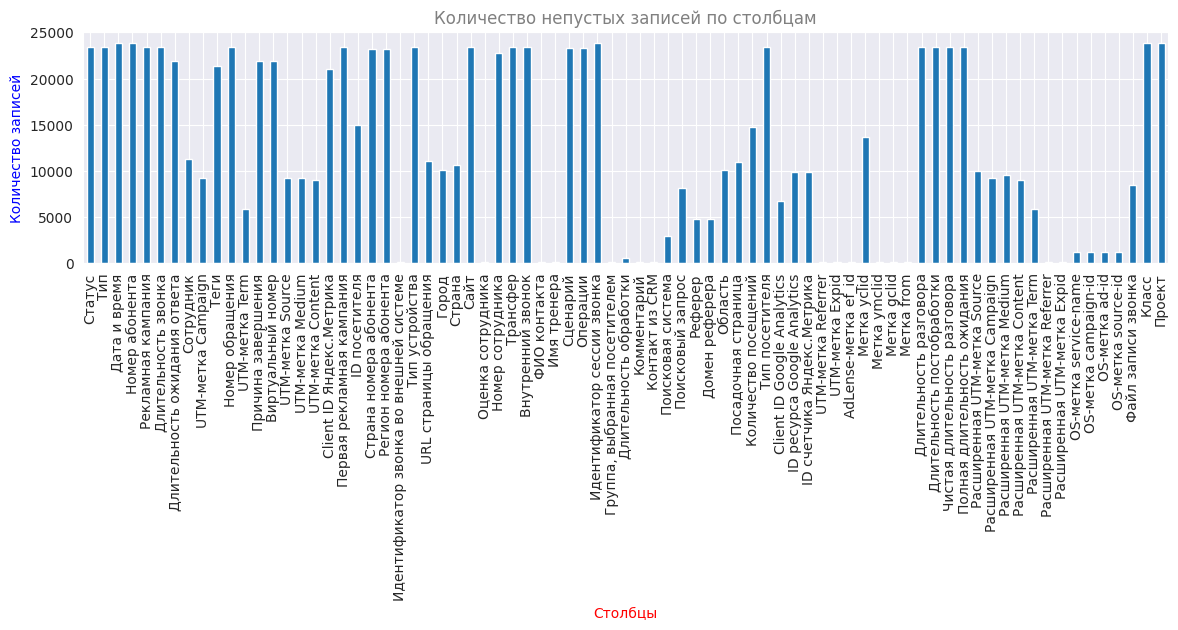

In [6]:
# @title График Data.count
Data = total_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

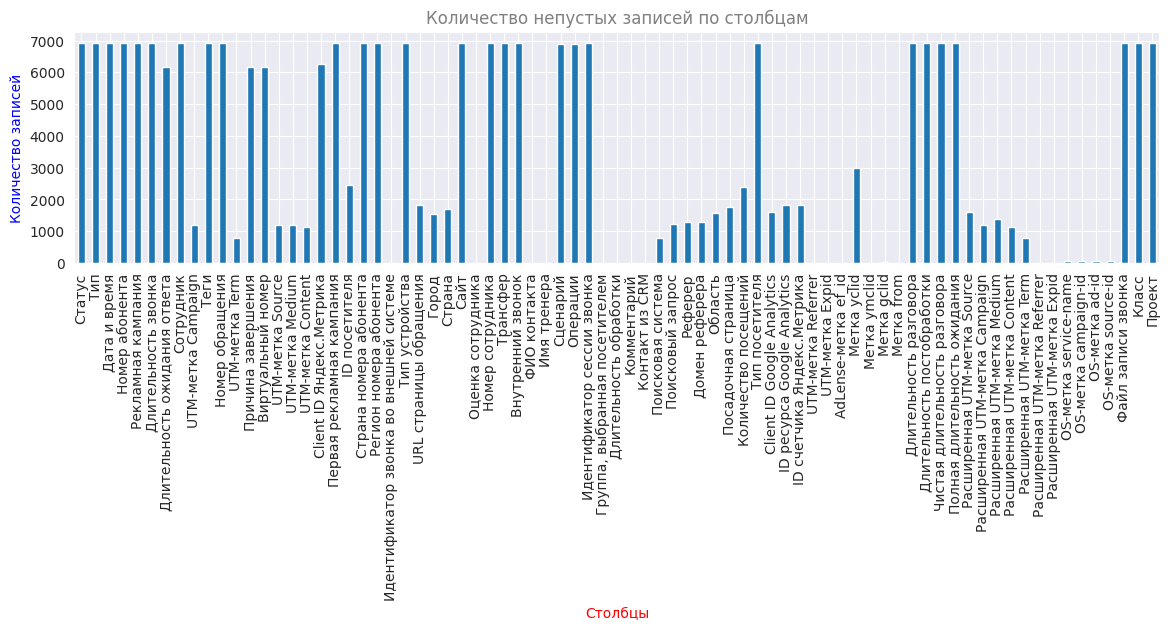

In [8]:
# @title График Data.count
Data = total_work_df # @param {type:"raw"}
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(14,3))
counts = Data.count()
ax = counts.plot.bar()
ax.set_xlabel('Столбцы', c='r')
ax.set_ylabel('Количество записей', c='b')
ax.set_title('Количество непустых записей по столбцам', c='gray')

plt.show()

In [23]:
# Описательные статистики длительности разговора total_df
pd.concat([total_df['Длительность разговора'][total_df['Класс'] == 'Целевой'].describe(),
           total_df['Длительность разговора'][total_df['Класс'] != 'Целевой'].describe()],
          axis=1,
          keys=['Целевые звонки', 'Нецелевые звонки'])

,Целевые звонки,Нецелевые звонки
count,2941.000000,20445.000000
mean,365.689561,44.009244
std,294.071888,129.901125
min,0.000000,0.000000
25%,154.000000,0.000000
50%,310.000000,0.000000
75%,498.000000,22.000000
max,2937.000000,3591.000000


In [24]:
# Описательные статистики длительности разговора total_work_df
pd.concat([total_work_df['Длительность разговора'][total_work_df['Класс'] == 'Целевой'].describe(),
           total_work_df['Длительность разговора'][total_work_df['Класс'] != 'Целевой'].describe()],
          axis=1,
          keys=['Целевые звонки', 'Нецелевые звонки'])

,Целевые звонки,Нецелевые звонки
count,2304.000000,4620.000000
mean,373.498698,84.407576
std,284.829923,157.380757
min,0.000000,0.000000
25%,169.000000,10.000000
50%,315.000000,33.000000
75%,497.000000,90.000000
max,2937.000000,3591.000000
